=== TREASURE HUNT WITH TELEPORTERS DEMONSTRATION ===
The agent (blue) must find the treasure (gold) while avoiding traps (red).
Teleporters (purple) will transport the agent between locations.
Let's watch a random agent try to solve this problem...

Game reset! Agent is back at the starting position (0,0).
Teleporter usage: 0

Starting state:


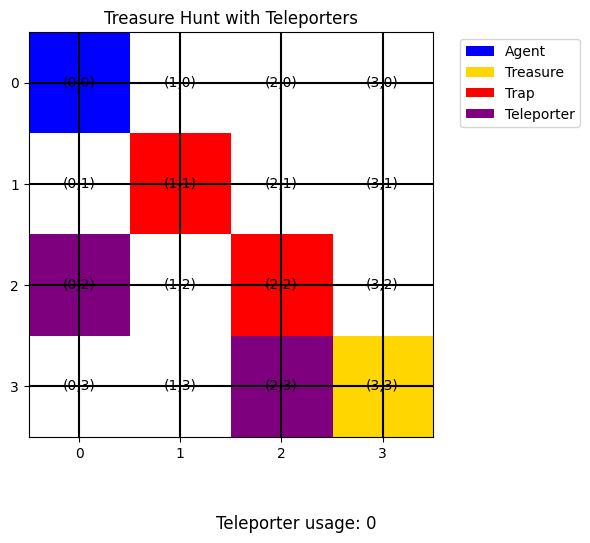


--- STEP 1 ---
Agent moved RIGHT from (0, 0) to (1, 0)
Agent took a step (-1 reward)


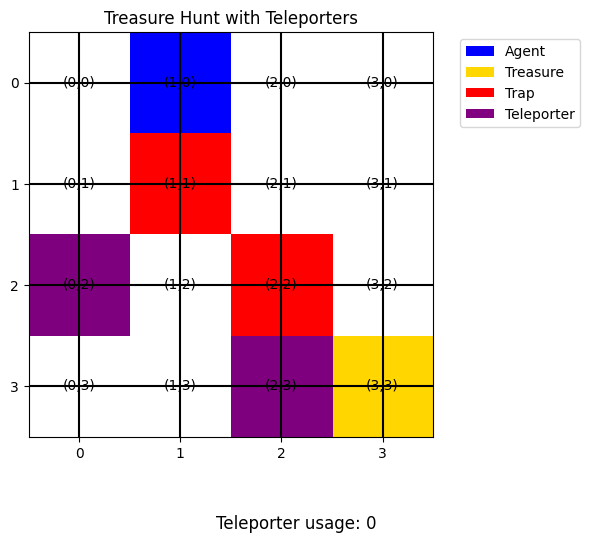


--- STEP 2 ---
Agent moved LEFT from (1, 0) to (0, 0)
Agent took a step (-1 reward)


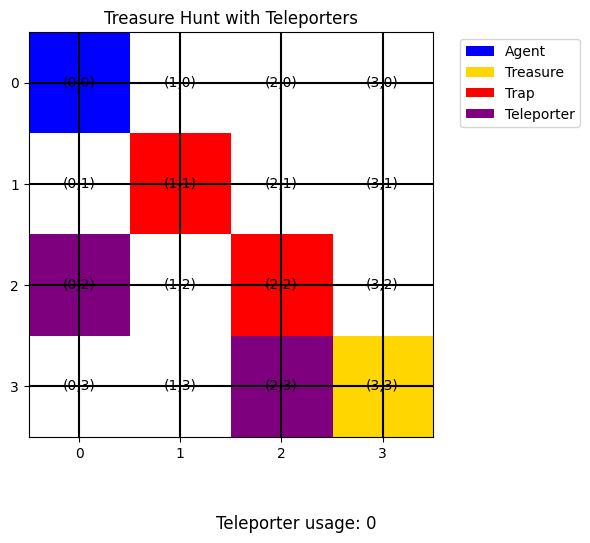


--- STEP 3 ---
Agent tried to move LEFT but hit a wall and stayed at (0, 0)
Agent took a step (-1 reward)


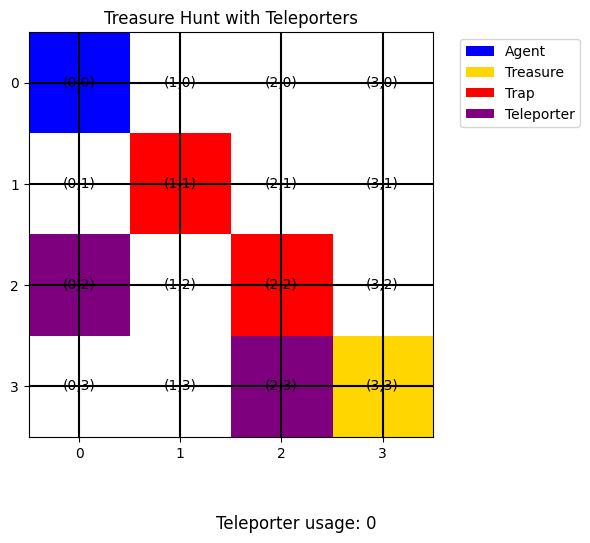


--- STEP 4 ---
Agent moved RIGHT from (0, 0) to (1, 0)
Agent took a step (-1 reward)


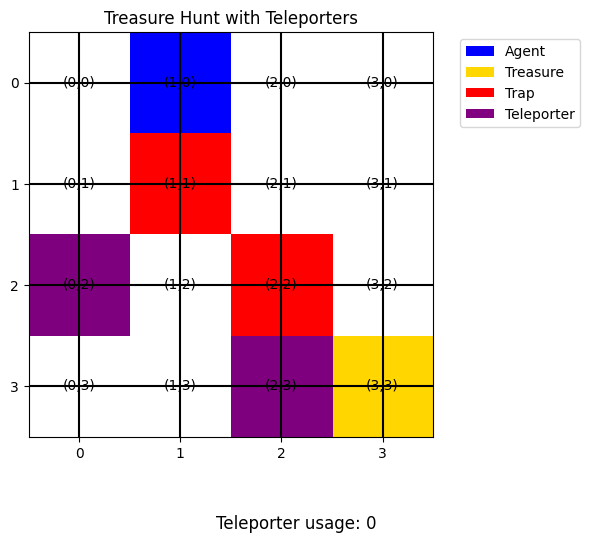


--- STEP 5 ---
Agent tried to move UP but hit a wall and stayed at (1, 0)
Agent took a step (-1 reward)


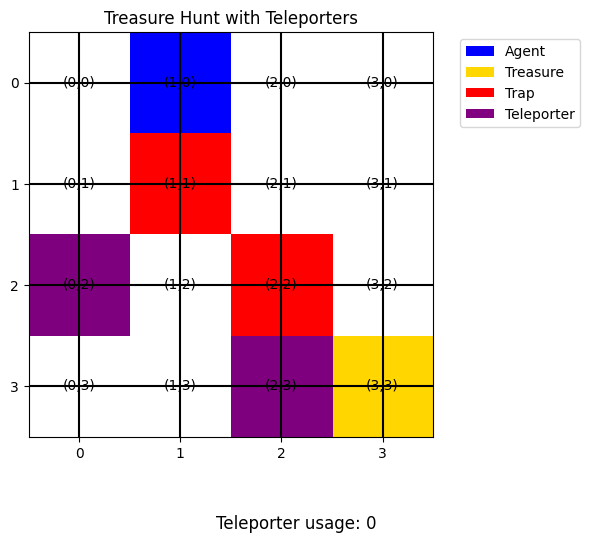


--- STEP 6 ---
Agent tried to move UP but hit a wall and stayed at (1, 0)
Agent took a step (-1 reward)


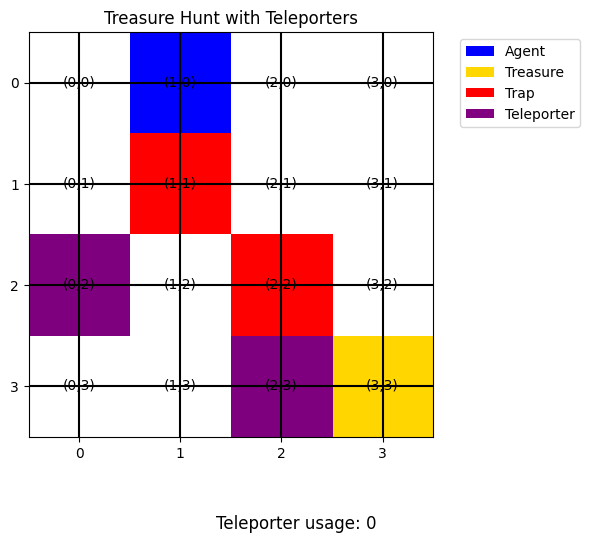


--- STEP 7 ---
Agent moved DOWN from (1, 0) to (1, 1)
Oh no! Agent fell into a trap! (-10 reward)


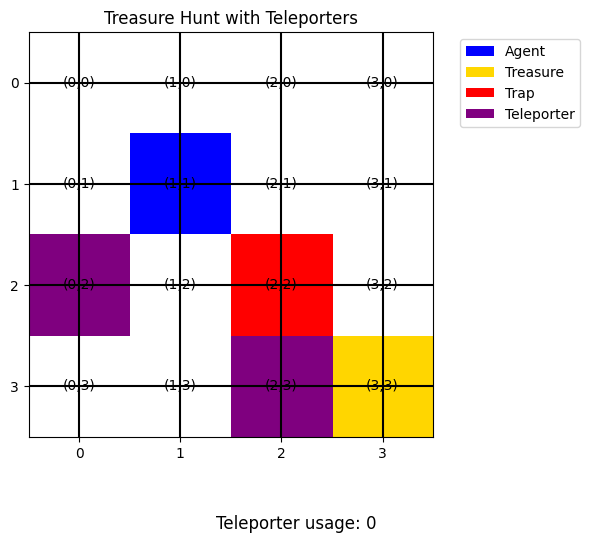


💥 The random agent fell into a trap!

Final teleporter usage: 0

This example shows how an agent interacts with an environment with teleporters in reinforcement learning.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

class TreasureHuntWithTeleporters:
    """
    A simple 4x4 grid world where an agent (blue circle) must find the treasure (gold star)
    while avoiding traps (red squares). The environment now includes teleporters!
    
    The grid is structured as follows:
        - The agent starts in the top-left corner (0,0)
        - The treasure is in the bottom-right corner (3,3)
        - There are two traps at positions (1,1) and (2,2)
        - There are two teleporters at positions (0,2) and (2,3)
    
    Actions:
        0: Move up
        1: Move right
        2: Move down
        3: Move left
    
    Rewards:
        +10: Finding the treasure (success)
        -10: Falling into a trap (failure)
        -1: Each move (encourages finding the shortest path)
    """
    def __init__(self):
        self.width = 4
        self.height = 4
        self.agent_position = (0, 0)  # Start at top-left corner
        self.treasure_position = (3, 3)  # Treasure at bottom-right corner
        self.traps = [(1, 1), (2, 2)]  # Traps in the middle
        self.teleporters = [(0, 2), (2, 3)]  # Teleporters
        self.teleport_count = 0  # Track teleporter usage
        
    def reset(self):
        """Reset the environment to initial state"""
        self.agent_position = (0, 0)
        self.teleport_count = 0
        print("Game reset! Agent is back at the starting position (0,0).")
        print("Teleporter usage: 0")
        return self.agent_position
    
    def step(self, action):
        """
        Take an action and return new state, reward, and whether done
        
        Action meanings:
        0: Move up    (decrease y by 1)
        1: Move right (increase x by 1)
        2: Move down  (increase y by 1)
        3: Move left  (decrease x by 1)
        """
        # Store previous position for explanation
        prev_position = self.agent_position
        x, y = self.agent_position
        
        # Update position based on action
        action_names = ["UP", "RIGHT", "DOWN", "LEFT"]
        if action == 0:  # up
            y = max(0, y-1)
        elif action == 1:  # right
            x = min(self.width-1, x+1)
        elif action == 2:  # down
            y = min(self.height-1, y+1)
        elif action == 3:  # left
            x = max(0, x-1)
            
        # Move agent to new position
        self.agent_position = (x, y)
        
        # Check if agent landed on a teleporter
        teleported = False
        if self.agent_position in self.teleporters:
            # Find the other teleporter
            teleporter_index = self.teleporters.index(self.agent_position)
            other_teleporter = self.teleporters[1 - teleporter_index]  # Clever way to get the other teleporter
            self.agent_position = other_teleporter
            self.teleport_count += 1
            teleported = True
        
        # Explain what happened
        if self.agent_position == prev_position:
            print(f"Agent tried to move {action_names[action]} but hit a wall and stayed at {self.agent_position}")
        elif teleported:
            print(f"Agent moved {action_names[action]} from {prev_position} to {(x, y)} and teleported to {self.agent_position}!")
            print(f"Teleporter usage: {self.teleport_count}")
        else:
            print(f"Agent moved {action_names[action]} from {prev_position} to {self.agent_position}")
        
        # Determine reward and done flag
        if self.agent_position == self.treasure_position:
            reward = 10  # Big reward for finding the treasure
            done = True
            print("Success! Agent found the treasure! (+10 reward)")
        elif self.agent_position in self.traps:
            reward = -10  # Big penalty for falling into a trap
            done = True
            print("Oh no! Agent fell into a trap! (-10 reward)")
        else:
            reward = -1  # Small penalty for each step (encourages finding shortest path)
            done = False
            print("Agent took a step (-1 reward)")
            
        return self.agent_position, reward, done
    
    def render(self):
        """Visualize the current state of the environment"""
        # Create a colorful grid
        grid = np.ones((self.height, self.width, 3))  # White background
        
        # Mark traps (red)
        for trap in self.traps:
            grid[trap[1], trap[0]] = [1, 0, 0]  # Red color
        
        # Mark teleporters (purple)
        for teleporter in self.teleporters:
            grid[teleporter[1], teleporter[0]] = [0.5, 0, 0.5]  # Purple color
        
        # Mark treasure (gold)
        grid[self.treasure_position[1], self.treasure_position[0]] = [1, 0.84, 0]  # Gold color
        
        # Mark agent (blue)
        grid[self.agent_position[1], self.agent_position[0]] = [0, 0, 1]  # Blue color
        
        # Display the grid
        plt.figure(figsize=(6, 6))
        plt.imshow(grid)
        plt.grid(True, color='black', linestyle='-', linewidth=1.5)
        plt.xticks(np.arange(self.width))
        plt.yticks(np.arange(self.height))
        
        # Add labels and legend
        plt.title('Treasure Hunt with Teleporters')
        
        # Create legend patches
        legend_elements = [
            Patch(facecolor='blue', label='Agent'),
            Patch(facecolor='gold', label='Treasure'),
            Patch(facecolor='red', label='Trap'),
            Patch(facecolor='purple', label='Teleporter')
        ]
        plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')
        
        # Add coordinate labels
        for i in range(self.width):
            for j in range(self.height):
                plt.text(i, j, f"({i},{j})", ha='center', va='center', color='black')
        
        # Add teleporter count
        plt.figtext(0.5, 0.01, f"Teleporter usage: {self.teleport_count}", ha="center", fontsize=12)
        
        plt.tight_layout()
        plt.show()

class RandomExplorer:
    """
    A simple agent that chooses random actions to explore the environment.
    This agent doesn't learn - it just helps demonstrate how the environment works.
    """
    def __init__(self):
        self.name = "Random Explorer"
    
    def select_action(self, state):
        """Select a random action (0=up, 1=right, 2=down, 3=left)"""
        return np.random.randint(0, 4)

# Run a demonstration of the treasure hunt with teleporters
def run_demo():
    print("=== TREASURE HUNT WITH TELEPORTERS DEMONSTRATION ===")
    print("The agent (blue) must find the treasure (gold) while avoiding traps (red).")
    print("Teleporters (purple) will transport the agent between locations.")
    print("Let's watch a random agent try to solve this problem...\n")

    env = TreasureHuntWithTeleporters()
    agent = RandomExplorer()

    state = env.reset()
    print("\nStarting state:")
    env.render()

    # Run until treasure is found, trap is hit, or 15 steps are taken
    for i in range(15):
        print(f"\n--- STEP {i+1} ---")
        action = agent.select_action(state)
        next_state, reward, done = env.step(action)
        
        state = next_state
        env.render()
        
        if done:
            if reward > 0:
                print("\n🎉 The random agent got lucky and found the treasure!")
            else:
                print("\n💥 The random agent fell into a trap!")
            break

    if not done:
        print("\nThe random agent didn't find the treasure or fall into a trap within 15 steps.")
    
    print("\nFinal teleporter usage:", env.teleport_count)
    print("\nThis example shows how an agent interacts with an environment with teleporters in reinforcement learning.")

if __name__ == "__main__":
    run_demo()